## 하이퍼 파라미터 튜닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

In [2]:
train = pd.read_csv('train_log_feature.csv')
train.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,3,6 years,RENT,18.90,15,부채 통합,0,0.0,0.0,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,5,10+ years,MORTGAGE,22.33,21,주택 개선,0,0.0,0.0,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,3,5 years,MORTGAGE,8.60,14,부채 통합,0,0.0,0.0,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,3,8 years,MORTGAGE,15.09,15,부채 통합,0,0.0,0.0,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,5,0,RENT,25.39,19,주요 구매,0,0.0,0.0,B,0.012697,0.008275,18.088503,12.339471,11.911413


In [3]:
from sklearn.preprocessing import RobustScaler

numeric_cols = ['대출금액', '대출기간', '연간소득_log', '부채_대비_소득_비율', 
                '총계좌수', '최근_2년간_연체_횟수', '총상환원금_log', '총상환이자_log',
               '총연체금액', '연체계좌수', '총상환원금비율', '총상환이자비율']

scaler = RobustScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [4]:
from sklearn.preprocessing import LabelEncoder

object = train.select_dtypes(include = 'object').columns
le = LabelEncoder()
for i in object:
    if i != '대출등급':
        train[i] = le.fit_transform(train[i])

In [5]:
train.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,0.0,7,2,0.012413,-0.600000,1,0.0,0.0,0.0,C,-0.946399,-0.967514,-0.119095,-10.790385,-8.705597
1,-0.173913,1.0,2,0,0.278510,-0.200000,10,0.0,0.0,0.0,B,-0.384226,-0.160701,0.769179,-0.381266,-0.141258
2,-0.347826,0.0,6,0,-0.786656,-0.666667,1,0.0,0.0,0.0,A,0.730573,-0.339006,0.308944,0.357474,-0.440557
3,-0.173913,0.0,9,0,-0.283165,-0.600000,1,0.0,0.0,0.0,C,-0.456080,-0.439745,0.782767,-0.492208,-0.435271
4,0.086957,1.0,0,2,0.515904,-0.333333,8,0.0,0.0,0.0,B,-0.671262,-0.556748,-0.124560,-0.779916,-0.454315


In [6]:
train_pre = train.copy()

In [7]:
train_pre.drop(['주택소유상태', '연체계좌수', '총연체금액', '최근_2년간_연체_횟수', '대출목적', '총계좌수', '근로기간'], axis=1, inplace=True)
train_pre.head()

,대출금액,대출기간,부채_대비_소득_비율,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,0.0,0.012413,C,-0.946399,-0.967514,-0.119095,-10.790385,-8.705597
1,-0.173913,1.0,0.278510,B,-0.384226,-0.160701,0.769179,-0.381266,-0.141258
2,-0.347826,0.0,-0.786656,A,0.730573,-0.339006,0.308944,0.357474,-0.440557
3,-0.173913,0.0,-0.283165,C,-0.456080,-0.439745,0.782767,-0.492208,-0.435271
4,0.086957,1.0,0.515904,B,-0.671262,-0.556748,-0.124560,-0.779916,-0.454315


In [13]:
# 데이터 준비
X = train_pre.drop(['대출등급'], axis=1)
y = train_pre['대출등급']

In [27]:
# hyperparameter tuning
# 더 많은 옵션을 추가하고 싶지만 노트북 성능상 불가능했음
params = {
    'n_estimators' : [100, 200],
    'max_depth' : [5, 10],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2],
}

In [19]:
# 채점 방식
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score_macro': make_scorer(f1_score, average='macro')
}

In [28]:
# 훈련
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1)
grid_search.fit(X,y)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)

In [29]:
# 최적의 파라미터 확인
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [31]:
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)

In [32]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9328930120924159
0.8813791293790807


In [33]:
# 특성 중요도 확인
rf.fit(X, y)
for feat, importance in zip(X.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

대출금액 : 0.028331453737632357
대출기간 : 0.03973262699848201
부채_대비_소득_비율 : 0.008741991879669982
총상환원금비율 : 0.4432029560630235
총상환이자비율 : 0.28459223135664086
연간소득_log : 0.011493116437557823
총상환원금_log : 0.09456812871690952
총상환이자_log : 0.08933749481008393


### 결과
 - 피쳐 8개 + 최적합 파라미터 모델
     - 정확도 : 약 93.3%
     - F1 score : 약 88.1%
     - 피쳐를 추가로 삭제하고 하이퍼 파라미터 튜닝 후 돌린 모델의 성능이 감소한 모습
 - 그 전 모델은 하이퍼 파라미터 튜닝 없이 돌린 것임으로 해당 모델로 그 전 훈련 세트와 동일하게 피쳐를 담아서 훈련해보기로 결정 (최적합 파라미터 모델 + 피쳐 11개)
     - 정확도 : 약 93.5%
     - F1 score : 약 88.8%
     - 크게 달라지지 않음
 - 또한 현재 훈련 세트를 최적의 파라미터를 사용하지 않고 시도(피쳐 8개 + 기본값 모델)
     - 정확도 : 약 94.5%
     - F1 score : 약 92.4%
     - 맨 처음 시도(피쳐 여러개 + 기본값 모델)와 아주 비슷한 차이지만 살짝 감소

 - 이전 결과(피쳐 총 11개, 기본값 모델)
     - 정확도 : 약 94.8%
     - F1 score : 약 92.8%
     
 - 지금까지 최상의 결과는 피쳐 11개와 기본값 모델

In [34]:
# 현재 모델로 이전 훈련 세트 적용해보기
X2 = train[['대출금액', '대출기간', '근로기간', 
            '부채_대비_소득_비율', '총계좌수', '대출목적', 
            '총상환원금비율', '총상환이자비율', '연간소득_log', 
            '총상환원금_log', '총상환이자_log']]
y2 = train['대출등급']

In [35]:
scores = cross_validate(rf, X2, y2, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9351880942152141
0.888128237526035


In [36]:
X.head()

,대출금액,대출기간,부채_대비_소득_비율,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,0.0,0.012413,-0.946399,-0.967514,-0.119095,-10.790385,-8.705597
1,-0.173913,1.0,0.278510,-0.384226,-0.160701,0.769179,-0.381266,-0.141258
2,-0.347826,0.0,-0.786656,0.730573,-0.339006,0.308944,0.357474,-0.440557
3,-0.173913,0.0,-0.283165,-0.456080,-0.439745,0.782767,-0.492208,-0.435271
4,0.086957,1.0,0.515904,-0.671262,-0.556748,-0.124560,-0.779916,-0.454315


In [37]:
# X와 y를 랜덤포레스트의 기본값으로 훈련
rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9453548590502978
0.9241434712734915


In [38]:
rf.fit(X, y)

[0.04962491 0.02863753 0.03709341 0.4232199  0.24583348 0.03265849
 0.09759904 0.08533324]


In [39]:
for feat, importance in zip(X.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

대출금액 : 0.04962490874847182
대출기간 : 0.028637532128435794
부채_대비_소득_비율 : 0.03709340777850663
총상환원금비율 : 0.4232198998317799
총상환이자비율 : 0.24583348457564794
연간소득_log : 0.03265848801847649
총상환원금_log : 0.0975990379505733
총상환이자_log : 0.08533324096810813


In [7]:
train_pre.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,0.0,7,2,0.012413,-0.600000,1,0.0,0.0,0.0,C,-0.946399,-0.967514,-0.119095,-10.790385,-8.705597
1,-0.173913,1.0,2,0,0.278510,-0.200000,10,0.0,0.0,0.0,B,-0.384226,-0.160701,0.769179,-0.381266,-0.141258
2,-0.347826,0.0,6,0,-0.786656,-0.666667,1,0.0,0.0,0.0,A,0.730573,-0.339006,0.308944,0.357474,-0.440557
3,-0.173913,0.0,9,0,-0.283165,-0.600000,1,0.0,0.0,0.0,C,-0.456080,-0.439745,0.782767,-0.492208,-0.435271
4,0.086957,1.0,0,2,0.515904,-0.333333,8,0.0,0.0,0.0,B,-0.671262,-0.556748,-0.124560,-0.779916,-0.454315


## 시도 결과
- 피쳐 5개 + 기본 모델
    - 정확도 : 94.6%
    - F1 score : 93.2%
    - 직전 최고 성적보다 정확도는 떨어지지만 F1 score가 오른 모습! -> 일반화가 된 것일수도
- 피쳐 4개 + 기본 모델 (연간소득_log 제외)
    - 정확도 : 94.7%
    - F1 score : 93.9%
    - 정확도와 F1 score 모두 미세하게 증가
- 피쳐 4개 + 튜닝 모델
    - 정확도 : 94.0%
    - F1 score : 92.0%
- 이상치 제거한 피쳐 6개 + 기본 모델
    - 정확도 : 94.7%
    - F1 score : 92.6%
    - 큰 차이 없음

In [10]:
# 피쳐 개수 과감하게 줄여보기
train_small = train_pre.drop(['대출목적', '최근_2년간_연체_횟수', '근로기간', '주택소유상태', '총계좌수', '총연체금액', '연체계좌수', '대출기간', '부채_대비_소득_비율'], axis=1)

In [12]:
# 대출금액은 총상환이자와 상관계수가 0.62 -> 제외 결정
train_small.drop(['대출금액'], axis=1, inplace=True)

In [13]:
X3 = train_small.drop(['대출등급'], axis=1)
y3 = train_small['대출등급']

In [15]:
# 채점 방식
from sklearn.metrics import make_scorer, f1_score, accuracy_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score_macro': make_scorer(f1_score, average='macro')
}

In [16]:
# 훈련(피쳐 5개 + 기본 모델)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X3, y3, cv=StratifiedKFold(), scoring=scoring)

In [17]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.945614468223396
0.9322792604697685


In [18]:
# 특성 중요도 확인
rf.fit(X3, y3)
for feat, importance in zip(X3.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

총상환원금비율 : 0.528145527456929
총상환이자비율 : 0.3105855066471978
연간소득_log : 0.02296593909234489
총상환원금_log : 0.07052244583780987
총상환이자_log : 0.06778058096571854


In [19]:
# 연간소득_log도 제외
X4 = X3.drop(['연간소득_log'], axis=1)
y4 = y3.copy()

In [20]:
X4.head()

,총상환원금비율,총상환이자비율,총상환원금_log,총상환이자_log
0,-0.946399,-0.967514,-10.790385,-8.705597
1,-0.384226,-0.160701,-0.381266,-0.141258
2,0.730573,-0.339006,0.357474,-0.440557
3,-0.456080,-0.439745,-0.492208,-0.435271
4,-0.671262,-0.556748,-0.779916,-0.454315


In [21]:
# 훈련(피쳐 4개 + 기본 모델)
rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X4, y4, cv=StratifiedKFold(), scoring=scoring)

In [22]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9465906508483266
0.9394670158995316


In [23]:
# 튜닝된 모델 + 피쳐 4개(총상환원금비율, 총상환이자비율, 총상환원금_log, 총상환이자_log)
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
scores = cross_validate(rf, X4, y4, cv=StratifiedKFold(), scoring=scoring)

In [24]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9396431703644863
0.9203564981742591


In [26]:
X4.head()

,총상환원금비율,총상환이자비율,총상환원금_log,총상환이자_log
0,-0.946399,-0.967514,-10.790385,-8.705597
1,-0.384226,-0.160701,-0.381266,-0.141258
2,0.730573,-0.339006,0.357474,-0.440557
3,-0.456080,-0.439745,-0.492208,-0.435271
4,-0.671262,-0.556748,-0.779916,-0.454315


## 이상치 제거

In [10]:
# 스케일링 전 데이터로 이상치 확인하기
train = pd.read_csv('train_log_feature.csv')
train.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,3,6 years,RENT,18.90,15,부채 통합,0,0.0,0.0,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,5,10+ years,MORTGAGE,22.33,21,주택 개선,0,0.0,0.0,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,3,5 years,MORTGAGE,8.60,14,부채 통합,0,0.0,0.0,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,3,8 years,MORTGAGE,15.09,15,부채 통합,0,0.0,0.0,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,5,0,RENT,25.39,19,주요 구매,0,0.0,0.0,B,0.012697,0.008275,18.088503,12.339471,11.911413


In [11]:
# 이 중 중요도가 높았던 피쳐들만 사용
train.drop(['대출기간', '근로기간', '주택소유상태', '총계좌수', '대출목적', '총연체금액', '연체계좌수', '부채_대비_소득_비율', '최근_2년간_연체_횟수'], axis=1, inplace=True)
train.head()

,대출금액,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,B,0.012697,0.008275,18.088503,12.339471,11.911413


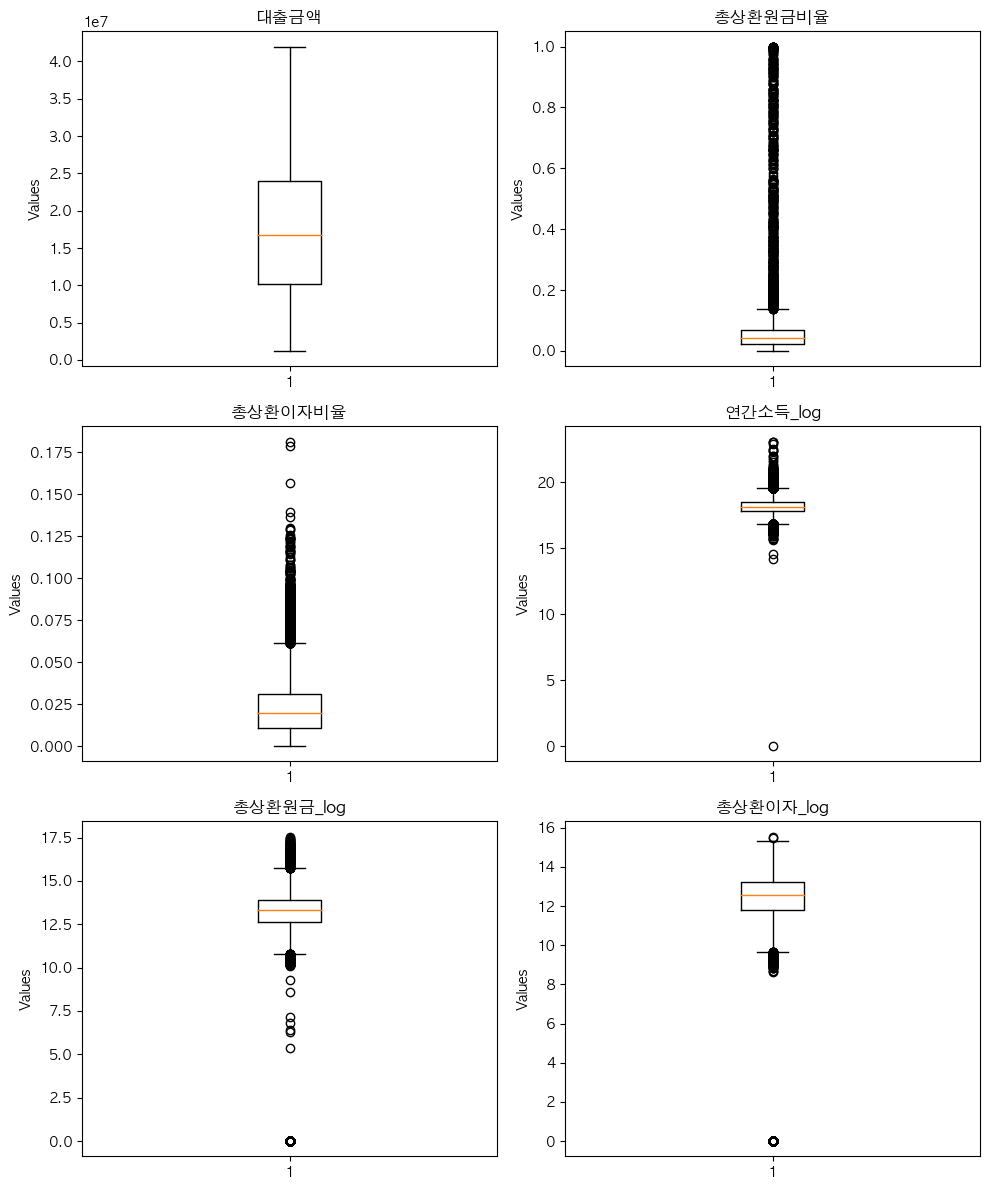

In [64]:
numerical_cols = ['대출금액', '총상환원금비율', '총상환이자비율', '연간소득_log', '총상환원금_log', '총상환이자_log']

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

for i, (column, values) in enumerate(train[numerical_cols].items()):
    row = i // 2
    col = i % 2
    axs[row, col].boxplot(values)
    axs[row, col].set_title(column)
    axs[row, col].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [12]:
# 이 중 특성 중요도가 가장 높았던 총상환원금비율의 이상치 제거 시도
# IQR 기법 사용
Q1 = train[['총상환원금비율']].quantile(0.25)
Q3 = train[['총상환원금비율']].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (train[['총상환원금비율']] < (Q1 - threshold * IQR)) | (train[['총상환원금비율']] > (Q3 + threshold * IQR))

train_no_outliers = train[~outliers.any(axis=1)]

print("이상치 제거 후 :")
print(train_no_outliers)

이상치 제거 후 :
           대출금액 대출등급   총상환원금비율   총상환이자비율   연간소득_log  총상환원금_log  총상환이자_log
0      12480000    C  0.000000  0.000000  18.092177   0.000000   0.000000
1      14400000    B  0.025943  0.016254  18.689180  12.830869  12.363337
2      12000000    A  0.077387  0.012662  18.379859  13.741482  11.931274
3      14400000    C  0.022627  0.010632  18.698312  12.694116  11.938905
4      18000000    B  0.012697  0.008275  18.088503  12.339471  11.911413
...         ...  ...       ...       ...        ...        ...        ...
96289  14400000    C  0.067679  0.034178  19.162618  13.789763  13.106577
96290  28800000    E  0.020268  0.029690  18.698312  13.277192  13.658956
96291  14400000    A  0.103412  0.016753  18.246327  14.213702  12.393535
96292  15600000    D  0.088357  0.052441  18.010153  14.136411  13.614712
96293   8640000    C  0.068999  0.031824  17.735502  13.298246  12.524370

[95546 rows x 7 columns]


In [13]:
train_no_outliers.head()

,대출금액,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,B,0.012697,0.008275,18.088503,12.339471,11.911413


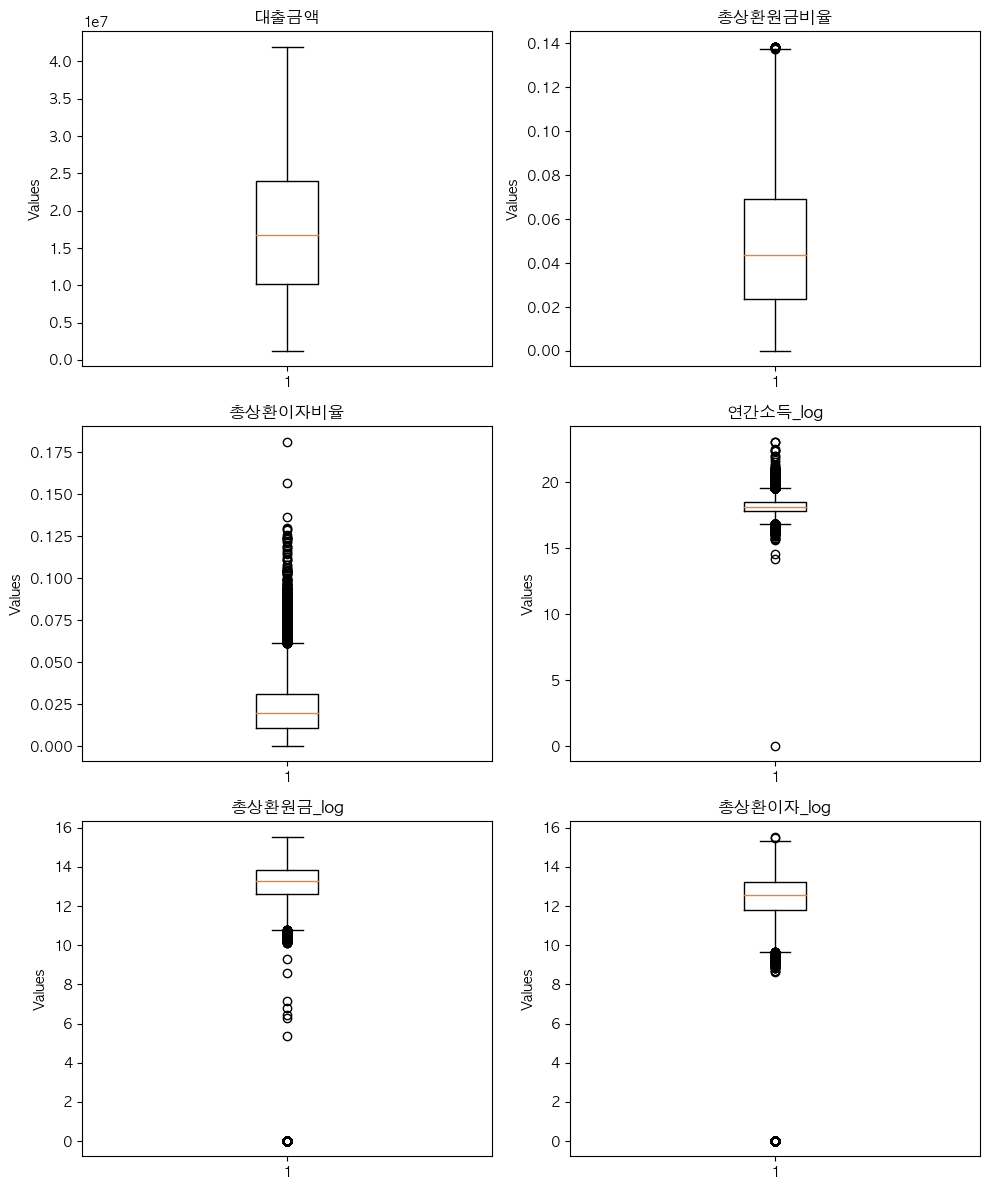

In [67]:
# 다시 확인 -> 이상치가 많이 제거됨
numerical_cols = ['대출금액', '총상환원금비율', '총상환이자비율', '연간소득_log', '총상환원금_log', '총상환이자_log']

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

for i, (column, values) in enumerate(train_no_outliers[numerical_cols].items()):
    row = i // 2
    col = i % 2
    axs[row, col].boxplot(values)
    axs[row, col].set_title(column)
    axs[row, col].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [68]:
train_no_outliers.shape

(95546, 7)

In [14]:
train_scaled = train_no_outliers.copy()

In [15]:
# 스케일링
from sklearn.preprocessing import RobustScaler

numeric_cols = ['대출금액','연간소득_log', '총상환원금_log', '총상환이자_log', '총상환원금비율', '총상환이자비율']

scaler = RobustScaler()
train_scaled[numeric_cols] = scaler.fit_transform(train_scaled[numeric_cols])

In [16]:
# 총상환원금비율 이상치 제거 + 스케일링 완료한 데이터 저장
train_scaled.to_csv('train_scaled.csv', index=False) 

In [73]:
X5 = train_scaled.drop(['대출등급'], axis=1)
y5 = train_scaled['대출등급']

In [74]:
# 기본 모델 + 이상치 제거된 피쳐 6개 훈련
rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X5, y5, cv=StratifiedKFold(), scoring=scoring)

In [75]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9467167579946152
0.9262533550947089


In [77]:
# 특성 중요도 확인
rf.fit(X5, y5)
for feat, importance in zip(X5.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

대출금액 : 0.05278790116111679
총상환원금비율 : 0.47296257187950574
총상환이자비율 : 0.2790518651504971
연간소득_log : 0.03311912151937355
총상환원금_log : 0.08290099913036593
총상환이자_log : 0.07917754115914095


In [80]:
train_scaled.head()

,대출금액,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,C,-0.957602,-0.963852,-0.119095,-10.843137,-8.705673
1,-0.173913,B,-0.387479,-0.160079,0.769179,-0.377136,-0.140917
2,-0.347826,A,0.743086,-0.337712,0.308944,0.365641,-0.440231
3,-0.173913,C,-0.460349,-0.438072,0.782767,-0.488684,-0.434944
4,0.086957,B,-0.678575,-0.554634,-0.124560,-0.777964,-0.453990


In [81]:
X6 = train_scaled.drop(['대출등급', '연간소득_log', '대출금액'], axis=1)
y6 = train_scaled['대출등급']

In [82]:
# 기본 모델 + 이상치 제거 + 피쳐 4개 훈련
rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X6, y6, cv=StratifiedKFold(), scoring=scoring)

In [83]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9502752473560545
0.9432493873812537


In [85]:
rf.fit(X6, y6)
for feat, importance in zip(X6.columns, rf.feature_importances_):
    print(f'{feat} : {importance}')

총상환원금비율 : 0.5758970357577758
총상환이자비율 : 0.33228112502854223
총상환원금_log : 0.0439723986388564
총상환이자_log : 0.04784944057482552


### 최고의 조합
 - 튜닝된 모델이 전체적으로 기본 모델보다 성능이 떨어졌음
 - 가장 성능이 좋았던 조합은 총상환원금비율의 이상치를 제거한 피쳐 4개(총상환원금비율, 총상환이자비율, 총상환원금_log, 총상환이자_log)와 기본 랜덤 포레스트 모델
    - 정확도 : 약 95%
    - F1 score : 약 94.3%
    - 정확도와 F1 점수 모두 가장 나은 모습을 보임
    
 - 피쳐가 많다고 좋은 성능이 나오지 않음
 - 파생 변수를 추가하고 난 후에 가장 눈에 띄는 성능 발전이 있었음 82% -> 94%
 - 로그 변환 등 여러가지 전처리를 했기 때문에 어느정도의 점수가 나오지 않았나 추측

In [89]:
# max_depth에 숫자 추가해서 다시 튜닝 시도
params = {
    'n_estimators' : [100, 200],
    'max_depth' : [5, 7, 10],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2],
}

In [90]:
# 같은 결과
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1)
grid_search.fit(X6,y6)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [93]:
# 이상치 제거 후의 피쳐 4개 + 튜닝 모델 
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
scores = cross_validate(rf, X6, y6, cv=StratifiedKFold(), scoring=scoring)

In [94]:
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9434827077435273
0.9247145331848255


## 총 정리
 - 중요도가 높은 특성 : 총상환원금비율, 총상환이자비율, 총상환원금_log, 총상환이자_log
 - 파생 변수를 추가한 11개의 특성이 높은 정확도와 F1 score를 보였으나, 중요도가 낮은 특성 제거, 중요도가 높은 특성의 이상치 제거로 미세한 성능 증가를 이루어낼 수 있었음
 - 시작 전 대출 등급 분류에 있어 중요할 것이라고 생각한 특성들이 중요도가 높지 않았음
     - 부채_대비_재산_비율, 최근_2년간_연체_횟수, 총연체금액, 근로기간
 - 총상환원금과 총상환이자는 중요할 것이라는 예상이 맞았음
 - 파생 변수가 성능을 올리는 데 중요한 역할을 함 -> 피쳐 엔지니어링의 중요성
 - 지금까지 해본 시도들의 결과 정리 : https://docs.google.com/spreadsheets/d/11ROzHFoLA7ktq79KhPgGNsK443K-CvhzO2lVlnwwOH8/edit?usp=sharing

In [18]:
# 데이터 불러오기
train = pd.read_csv('train_log_feature.csv')
train.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,3,6 years,RENT,18.90,15,부채 통합,0,0.0,0.0,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,5,10+ years,MORTGAGE,22.33,21,주택 개선,0,0.0,0.0,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,3,5 years,MORTGAGE,8.60,14,부채 통합,0,0.0,0.0,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,3,8 years,MORTGAGE,15.09,15,부채 통합,0,0.0,0.0,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,5,0,RENT,25.39,19,주요 구매,0,0.0,0.0,B,0.012697,0.008275,18.088503,12.339471,11.911413


In [19]:
# 4개의 피쳐만 사용할 예정
train.drop(['대출금액', '대출기간', '근로기간', '주택소유상태', '부채_대비_소득_비율', '총계좌수', '대출목적',
           '최근_2년간_연체_횟수', '총연체금액', '연체계좌수', '연간소득_log'], axis=1, inplace=True)
train.head()

,대출등급,총상환원금비율,총상환이자비율,총상환원금_log,총상환이자_log
0,C,0.000000,0.000000,0.000000,0.000000
1,B,0.025943,0.016254,12.830869,12.363337
2,A,0.077387,0.012662,13.741482,11.931274
3,C,0.022627,0.010632,12.694116,11.938905
4,B,0.012697,0.008275,12.339471,11.911413


In [23]:
train.shape

(96294, 5)

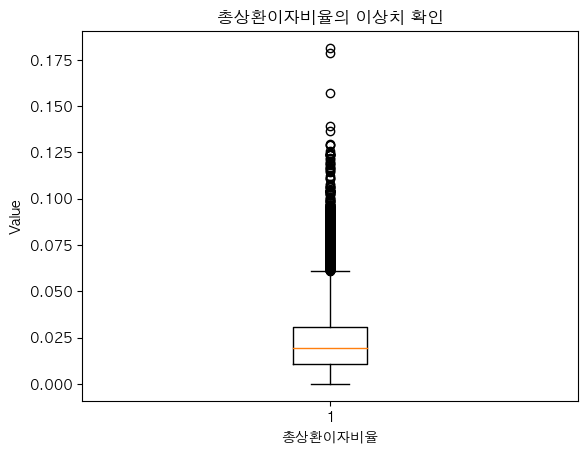

In [20]:
# 총상환원금이자비율의 이상치 확인
plt.boxplot(train['총상환이자비율'])
plt.title('총상환이자비율의 이상치 확인')
plt.xlabel('총상환이자비율')
plt.ylabel('Value')

plt.show()

In [21]:
# 이상치 제거
Q1 = train[['총상환이자비율']].quantile(0.25)
Q3 = train[['총상환이자비율']].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (train[['총상환이자비율']] < (Q1 - threshold * IQR)) | (train[['총상환이자비율']] > (Q3 + threshold * IQR))

train_no_outliers = train[~outliers.any(axis=1)]

In [24]:
train_no_outliers.shape

(94385, 5)

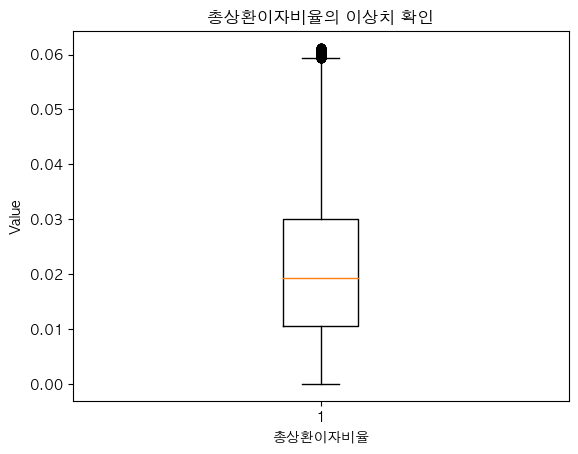

In [26]:
# 확인
plt.boxplot(train_no_outliers['총상환이자비율'])
plt.title('총상환이자비율의 이상치 확인')
plt.xlabel('총상환이자비율')
plt.ylabel('Value')

plt.show()

In [28]:
# 스케일링
from sklearn.preprocessing import RobustScaler

train_post = train_no_outliers.copy()

numeric_cols = ['총상환원금비율', '총상환이자비율', '총상환원금_log', '총상환이자_log']

scaler = RobustScaler()
train_post[numeric_cols] = scaler.fit_transform(train_post[numeric_cols])

In [29]:
# 데이터 분리
X = train_post.drop(['대출등급'], axis=1)
y = train_post['대출등급']

In [31]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score_macro': make_scorer(f1_score, average='macro')
}

In [32]:
# 총상환원금비율 이상치 제거 + 기본 모델 훈련
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9465804947820098
0.9330212984613209


In [53]:
# 두 피쳐 모두 이상치 제거
train_two = pd.read_csv('train_log_feature.csv')
train_two.head()

,대출금액,대출기간,근로기간,주택소유상태,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총연체금액,연체계좌수,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,12480000,3,6 years,RENT,18.90,15,부채 통합,0,0.0,0.0,C,0.000000,0.000000,18.092177,0.000000,0.000000
1,14400000,5,10+ years,MORTGAGE,22.33,21,주택 개선,0,0.0,0.0,B,0.025943,0.016254,18.689180,12.830869,12.363337
2,12000000,3,5 years,MORTGAGE,8.60,14,부채 통합,0,0.0,0.0,A,0.077387,0.012662,18.379859,13.741482,11.931274
3,14400000,3,8 years,MORTGAGE,15.09,15,부채 통합,0,0.0,0.0,C,0.022627,0.010632,18.698312,12.694116,11.938905
4,18000000,5,0,RENT,25.39,19,주요 구매,0,0.0,0.0,B,0.012697,0.008275,18.088503,12.339471,11.911413


In [54]:
train_two.drop(['대출금액', '대출기간', '근로기간', '주택소유상태', '부채_대비_소득_비율', '총계좌수', '대출목적',
           '최근_2년간_연체_횟수', '총연체금액', '연체계좌수', '연간소득_log'], axis=1, inplace=True)
train_two.head()

,대출등급,총상환원금비율,총상환이자비율,총상환원금_log,총상환이자_log
0,C,0.000000,0.000000,0.000000,0.000000
1,B,0.025943,0.016254,12.830869,12.363337
2,A,0.077387,0.012662,13.741482,11.931274
3,C,0.022627,0.010632,12.694116,11.938905
4,B,0.012697,0.008275,12.339471,11.911413


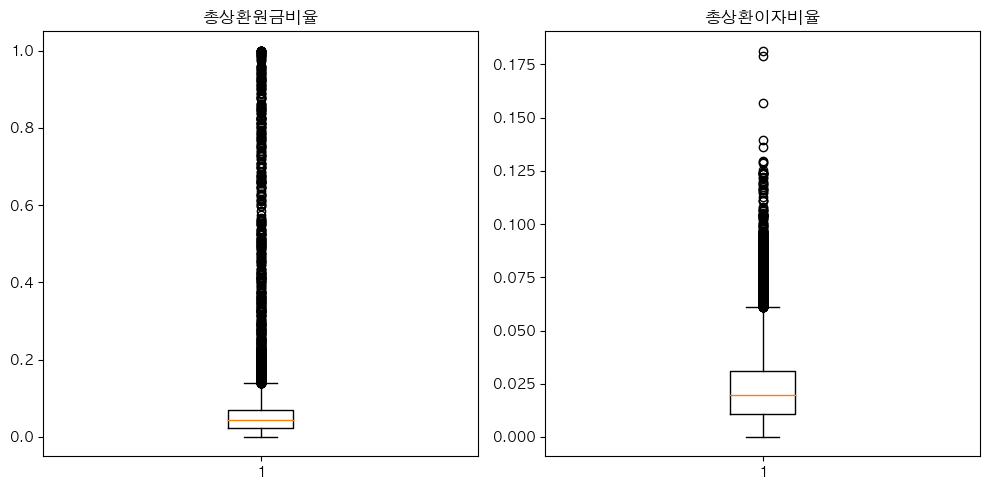

In [55]:
preprocessed_cols = ['총상환원금비율', '총상환이자비율']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, column in enumerate(preprocessed_cols):
    ax = axs[i]
    ax.boxplot(train_two[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [56]:
# 총상환이자비율 이상치 제거
Q1 = train_two[['총상환이자비율']].quantile(0.25)
Q3 = train_two[['총상환이자비율']].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (train_two[['총상환이자비율']] < (Q1 - threshold * IQR)) | (train_two[['총상환이자비율']] > (Q3 + threshold * IQR))

train_no_outliers2 = train_two[~outliers.any(axis=1)]

In [57]:
# 총상환원금비율 이상치 제거
Q1 = train_no_outliers2[['총상환원금비율']].quantile(0.25)
Q3 = train_no_outliers2[['총상환원금비율']].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (train_no_outliers2[['총상환원금비율']] < (Q1 - threshold * IQR)) | (train_no_outliers2[['총상환원금비율']] > (Q3 + threshold * IQR))

train_no_outliers3 = train_no_outliers2[~outliers.any(axis=1)]

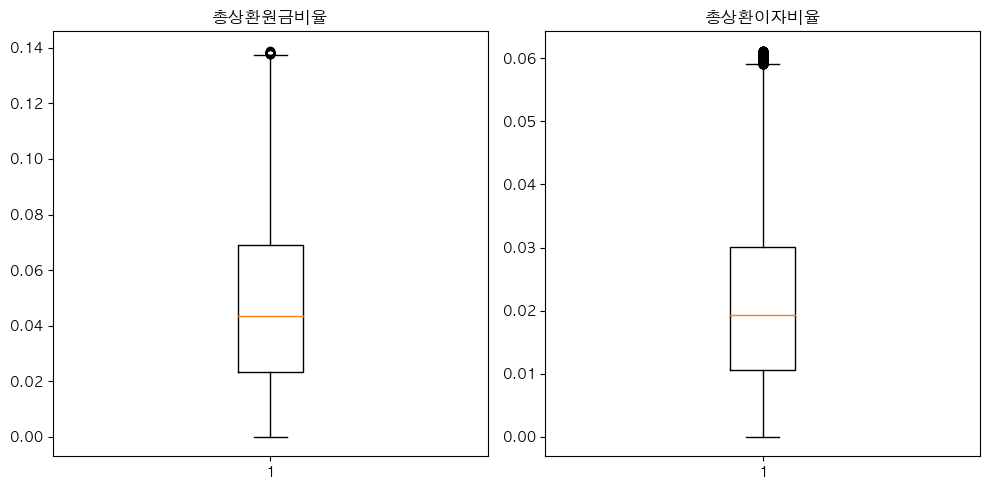

In [58]:
# 이상치 제거 확인
preprocessed_cols = ['총상환원금비율', '총상환이자비율']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, column in enumerate(preprocessed_cols):
    ax = axs[i]
    ax.boxplot(train_no_outliers3[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [62]:
train_final = train_no_outliers3.copy()
train_final.head()

,대출등급,총상환원금비율,총상환이자비율,총상환원금_log,총상환이자_log
0,C,0.000000,0.000000,0.000000,0.000000
1,B,0.025943,0.016254,12.830869,12.363337
2,A,0.077387,0.012662,13.741482,11.931274
3,C,0.022627,0.010632,12.694116,11.938905
4,B,0.012697,0.008275,12.339471,11.911413


In [60]:
# 데이터 저장 (2개 피쳐에서 이상치 제거한 버전 - 스케일링 되어있지 않음!)
train_final.to_csv('train_processed.csv', index=False)

In [63]:
# 스케일링
from sklearn.preprocessing import RobustScaler

numeric_cols = ['총상환원금비율', '총상환이자비율', '총상환원금_log', '총상환이자_log']

scaler = RobustScaler()
train_final[numeric_cols] = scaler.fit_transform(train_final[numeric_cols])

In [64]:
X = train_final.drop(['대출등급'], axis=1)
y = train_final['대출등급']

In [65]:
# 피쳐 2개 이상치 제거(총 4개) + 기본 모델 훈련
rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9501403226376837
0.9378653782122093


In [66]:
# 피쳐 2개 이상치 제거(총 4개) + 튜닝 모델 훈련
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=5,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_macro']))

0.9439612325905051
0.9132751461690981


In [2]:
train_scaled = pd.read_csv('train_scaled.csv')
train_scaled.head()

,대출금액,대출등급,총상환원금비율,총상환이자비율,연간소득_log,총상환원금_log,총상환이자_log
0,-0.313043,C,-0.957602,-0.963852,-0.119095,-10.843137,-8.705673
1,-0.173913,B,-0.387479,-0.160079,0.769179,-0.377136,-0.140917
2,-0.347826,A,0.743086,-0.337712,0.308944,0.365641,-0.440231
3,-0.173913,C,-0.460349,-0.438072,0.782767,-0.488684,-0.434944
4,0.086957,B,-0.678575,-0.554634,-0.124560,-0.777964,-0.453990


In [4]:
train_scaled.drop(['대출금액', '연간소득_log'], axis=1, inplace=True)

In [5]:
X = train_scaled.drop(['대출등급'], axis=1)
y = train_scaled['대출등급']

In [8]:
# macro 대신 weighted 사용
from sklearn.metrics import make_scorer, f1_score, accuracy_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score_weighted': make_scorer(f1_score, average='weighted')
}

In [9]:
# weighted F1 점수 확인
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

rf = RandomForestClassifier(random_state=42)
scores = cross_validate(rf, X, y, cv=StratifiedKFold(), scoring=scoring)
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_f1_score_weighted']))

0.9502752473560545
0.950893950439483
